In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# code so we can import functions from src folder

import os
import sys

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.learning_curve_plot import learning_curve_plot
from src.helpers import feature_importance_plot

In [3]:
# import scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
# load saved pkl from last notebook

users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")

users_data.head(n = 10)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_not contacted,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.000000,2143.000000,58,False,True,False,261,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
1,3.977407,1369.845345,44,False,True,False,151,1,-1,0,...,0,1,0,0,1,0,0,1,0,0
2,2.000000,2.000000,33,False,True,True,76,1,-1,0,...,0,1,0,0,1,0,0,0,1,0
3,3.977407,1369.845345,47,False,True,False,92,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
4,1.000000,1.000000,33,False,False,False,198,1,-1,0,...,0,0,0,0,1,0,0,0,1,0
5,2.000000,231.000000,35,False,True,False,139,1,-1,0,...,0,0,1,0,1,0,0,1,0,0
6,2.000000,447.000000,28,False,True,True,217,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
7,1.000000,2.000000,42,True,True,False,380,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
8,3.977407,1369.845345,58,False,True,False,50,1,-1,0,...,1,0,0,0,1,0,0,1,0,0
9,2.000000,593.000000,43,False,True,False,55,1,-1,0,...,0,1,0,0,1,0,0,0,1,0


In [5]:
users_data.shape

(45179, 37)

In [6]:
# check that we have no null values

users_data.isnull().sum()

number_transactions      0
total_amount_usd         0
age                      0
default                  0
housing                  0
loan                     0
duration                 0
campaign                 0
pdays                    0
previous                 0
term_deposit             0
job_Unknown              0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
marital_divorced         0
marital_married          0
marital_single           0
education_Unknown        0
education_primary        0
education_secondary      0
education_tertiary       0
contact_cellular         0
contact_not contacted    0
contact_telephone        0
device_Unknown           0
device_desktop           0
device_mobile            0
device_tablet            0
d

In [7]:
# check that there is no non numerical type data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_transactions    45179 non-null  float64
 1   total_amount_usd       45179 non-null  float64
 2   age                    45179 non-null  int64  
 3   default                45179 non-null  bool   
 4   housing                45179 non-null  bool   
 5   loan                   45179 non-null  bool   
 6   duration               45179 non-null  int64  
 7   campaign               45179 non-null  int64  
 8   pdays                  45179 non-null  int64  
 9   previous               45179 non-null  int64  
 10  term_deposit           45179 non-null  bool   
 11  job_Unknown            45179 non-null  uint8  
 12  job_admin.             45179 non-null  uint8  
 13  job_blue-collar        45179 non-null  uint8  
 14  job_entrepreneur       45179 non-null  uint8  
 15  jo

### prepare data for ML


In [8]:
# define our features and targets

target = users_data['total_amount_usd']
features = users_data.drop(['total_amount_usd'], axis = 1)

In [9]:
features.shape

(45179, 36)

### Split the data into a training and test set


In [10]:
# split into test and training data
# remember it is common to keep 80% for training data and 20% for test data
# 70 - 30 split is also fine

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2,
                                                random_state = 0)

In [11]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Training Data
X_train shape: (36143, 36)
y_train shape: (36143,)


In [12]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (9036, 36)
y_test shape: (9036,)


### Build Random Forest Model


In [13]:
# Build a Random Forest Model

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [1520.36845345 1306.3669069  1470.73854325 3555.16845345 -143.05      ]
first five actual values: [1196.0, 566.0, 1369.8453450039785, 4833.0, 3.0]


### Evaluate model on test set


In [15]:
# the evaluation metrics for the model on the test set

r2 = r2_score(y_test, y_pred_rf)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", round(mse))

R2: -0.08
Mean Absolute Error: 1233
Mean Squared Error: 6244264


### Evaluate model on training set


In [16]:
# the evaluation metrics for the model on the training set

y_pred_train_rf = rf.predict(X_train)

r2 = r2_score(y_train, y_pred_train_rf)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train_rf)
print("Mean Squared Error:", round(mse))

R2: 0.85
Mean Absolute Error: 473
Mean Squared Error: 1127176


## Function to plot Feature importance
#### can be accessed by running this cell or callling it from helpers in src

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Decision Tree based Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

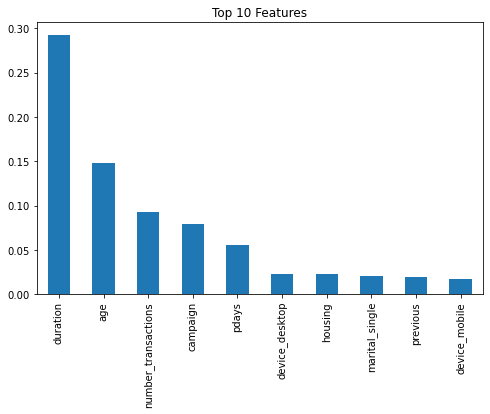

In [17]:
feature_importance_plot(rf, X_train, n = 10)

# what are the most important features?

## Funtion to plot learning curve
#### can be accessed by running this cell of calling the function from the src folder
   
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score


def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

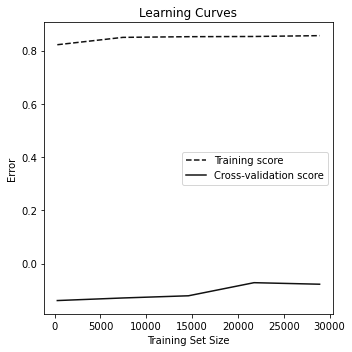

In [18]:
learning_curve_plot(rf, X_train, y_train, scoring='r2')

In [19]:
# Build the Decision Tree model

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [20]:
# Make predictions and call this variable y_pred_dt

y_pred_dt = dt.predict(X_test)

In [21]:
# Optional: Print the first five predicted vs actual values

print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [ 181.         42.       1369.845345    0.       -438.      ]
first five actual values: [1196.0, 566.0, 1369.8453450039785, 4833.0, 3.0]


In [22]:
# the evaluation metrics for the model on the test set

r2 = r2_score(y_test, y_pred_dt)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", round(mse))


R2: -2.12
Mean Absolute Error: 1618
Mean Squared Error: 18022760


In [23]:
# the evaluation metrics for the model on the training set

y_pred_train_dt = dt.predict(X_train)

r2 = r2_score(y_train, y_pred_train_dt)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train_dt)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train_dt)
print("Mean Squared Error:", round(mse))

# seeing low error rates on the training set, in this case no error rate - signs of overfitting

R2: 1.0
Mean Absolute Error: 0
Mean Squared Error: 624


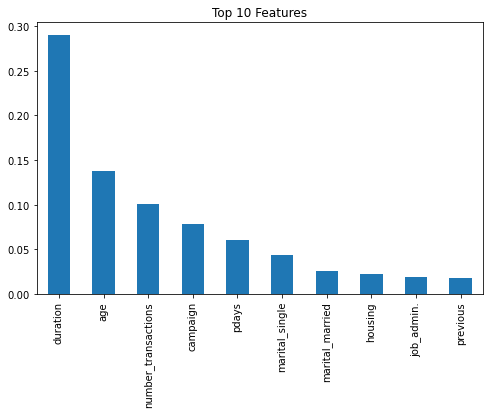

In [24]:
feature_importance_plot(dt, X_train, n = 10)

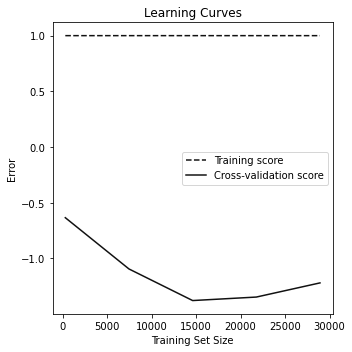

In [25]:
learning_curve_plot(dt, X_train, y_train, scoring='r2')